In [1]:
! pip install  category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import  statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from PIL import Image 

#### Here we explore a big database of books. Books of different genres, from thousands of authors.A Machine Learning model was build to predict the price of books based on a given set of features. Size of training set: 6237 records Size of test set: 1560 records FEATURES: Title: The title of the book Author: The author(s) of the book. Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) Reviews: The customer reviews about the book Ratings: The customer ratings of the book Synopsis: The synopsis of the book Genre: The genre the book belongs to BookCategory: The department the book is usually available at. Price: The price of the book (Target variable)

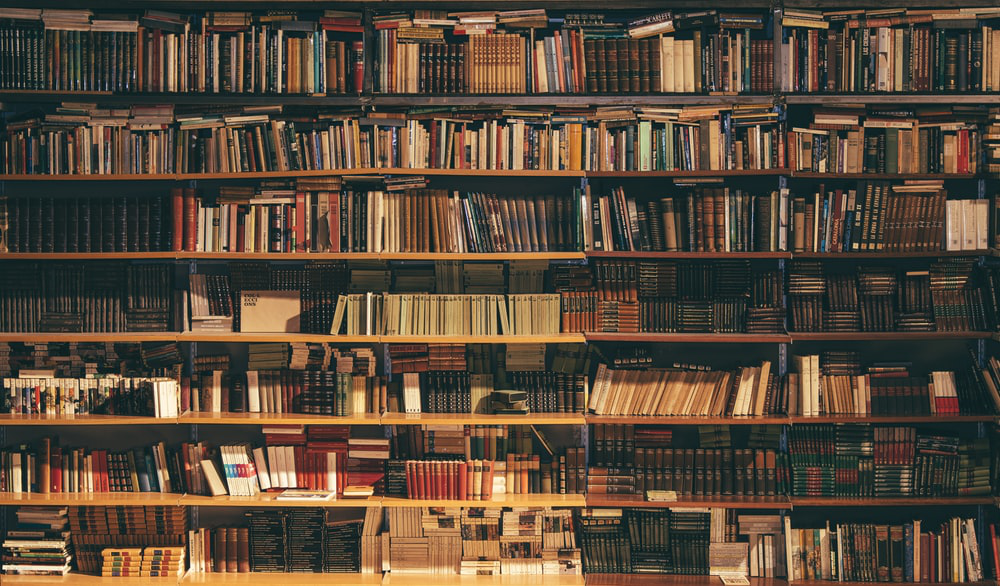

In [3]:
Image.open('book.jpg') 


In [4]:
df1=pd.read_excel('Data_Train.xlsx',index_col=0)
df1.shape

(6237, 8)

In [5]:
df2=pd.read_excel('Data_Test.xlsx',index_col=0)
df2.shape

(1560, 7)

In [6]:
df=pd.concat([df1,df2],axis=0)
df.head()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
Title,,,,,,,,
The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [7]:
df.shape

(7797, 8)

##### 7797 rows and 9 columns 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, The Prisoner's Gold (The Hunters 3) to The First Order (Sam Capra)
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Edition       6237 non-null   object 
 2   Reviews       6237 non-null   object 
 3   Ratings       6237 non-null   object 
 4   Synopsis      6237 non-null   object 
 5   Genre         6237 non-null   object 
 6   BookCategory  6237 non-null   object 
 7   Price         6237 non-null   float64
dtypes: float64(1), object(7)
memory usage: 438.5+ KB


##### Training data consists of no null values. All the independent variables are categorical and the target variable is continuos

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, The Complete Sherlock Holmes: 2 Boxes sets to Complete Spanish Step-by-Step
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Author        1560 non-null   object
 1   Edition       1560 non-null   object
 2   Reviews       1560 non-null   object
 3   Ratings       1560 non-null   object
 4   Synopsis      1560 non-null   object
 5   Genre         1560 non-null   object
 6   BookCategory  1560 non-null   object
dtypes: object(7)
memory usage: 97.5+ KB


##### Testing data consists of no null values

In [10]:
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


##### The min value falls below 25% and max value falls above 75% indicating outliers in target variables

In [11]:
df_num=df.select_dtypes(np.number)

<AxesSubplot:>

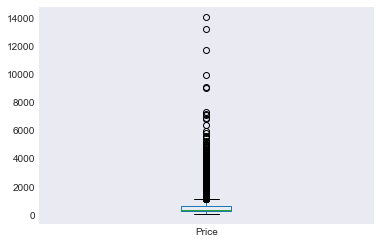

In [12]:
plt.style.use('seaborn-dark')
df_num.plot(kind='box')


In [13]:
df_cat=df.select_dtypes(np.object)

In [14]:
df_cat.describe()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,7797,7797,7797,7797,7797,7797,7797
unique,4372,3882,36,368,6771,363,11
top,Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,87,60,1751,1328,8,1183,1036


##### The unique values in each categorical variables shows the different classes and the frequency of the value repeated the most

In [15]:
encode=TargetEncoder()
encode.fit(df_cat,df_num)

TargetEncoder(cols=['Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis',
                    'Genre', 'BookCategory'])

In [16]:
encoded_cat=encode.transform(df_cat)
encoded_cat

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
Title,,,,,,,
The Prisoner's Gold (The Hunters 3),242.826370,373.090882,585.415088,485.781947,560.707516,401.822936,415.810905
Guru Dutt: A Tragedy in Three Acts,560.707516,344.562101,467.423361,469.504321,560.707516,732.006923,345.142701
Leviathan (Penguin Classics),330.196301,330.196301,580.589820,592.683694,330.196301,492.070001,654.300574
A Pocket Full of Rye (Miss Marple),241.170870,228.033542,418.689806,453.639300,560.707516,342.978945,337.337593
LIFE 70 Years of Extraordinary Photography,560.707516,560.707516,786.563462,771.994933,560.707516,1439.466889,833.266151
...,...,...,...,...,...,...,...
100 Things Every Designer Needs to Know About People (Voices That Matter),560.707516,987.859549,786.563462,694.803127,560.707516,1144.845158,967.078922
"Modern Letter Writing Course: Personal, Business and Official Letter Writing for All Occasions",560.707516,337.217414,415.474727,453.639300,560.707516,368.071864,345.142701
The Kite Runner Graphic Novel,560.707516,NaN,585.415088,600.204100,NaN,622.547551,654.300574


##### Encoded categorical variables using Target Encoder

In [17]:
encoded_cat.describe()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,7079.000000,7247.000000,7797.000000,7771.000000,6550.000000,7774.000000,7797.000000
mean,518.286212,519.305617,562.231895,571.114289,554.450701,556.713494,562.798709
std,288.314868,276.259402,141.986148,153.341870,190.293347,291.107913,210.100021
min,66.993287,65.938955,260.833842,124.707179,56.836272,125.454306,337.337593
25%,359.262604,365.428072,442.137301,461.296111,560.707516,386.785493,356.025661
50%,560.707516,560.707516,547.354280,592.683694,560.707516,454.942815,462.115859
75%,560.707516,560.707516,585.415088,666.919280,560.707516,668.766469,752.331235
max,4069.636987,4128.852732,788.002667,2590.321603,4128.852732,3429.746462,967.078922


<AxesSubplot:>

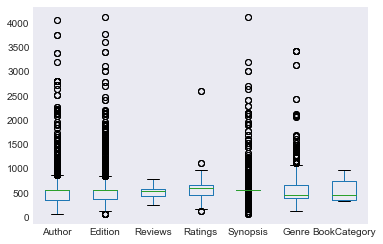

In [18]:
encoded_cat.plot(kind='box')

##### Checking for outliers in  encoded categorical variables

<AxesSubplot:ylabel='Title'>

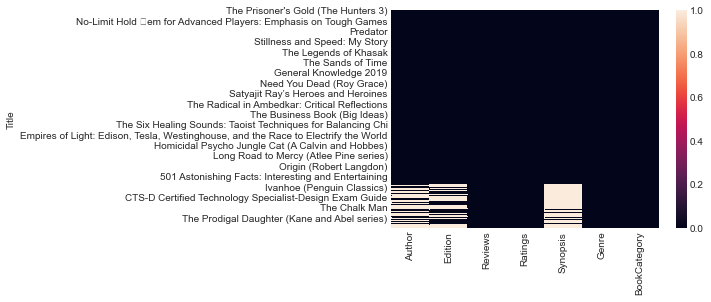

In [19]:
sns.heatmap(encoded_cat.isnull(),cbar=True)

In [20]:
encoded_cat.isnull().sum()

Author           718
Edition          550
Reviews            0
Ratings           26
Synopsis        1247
Genre             23
BookCategory       0
dtype: int64

In [21]:
encoded_cat.drop(columns=['Synopsis'])

,Author,Edition,Reviews,Ratings,Genre,BookCategory
Title,,,,,,
The Prisoner's Gold (The Hunters 3),242.826370,373.090882,585.415088,485.781947,401.822936,415.810905
Guru Dutt: A Tragedy in Three Acts,560.707516,344.562101,467.423361,469.504321,732.006923,345.142701
Leviathan (Penguin Classics),330.196301,330.196301,580.589820,592.683694,492.070001,654.300574
A Pocket Full of Rye (Miss Marple),241.170870,228.033542,418.689806,453.639300,342.978945,337.337593
LIFE 70 Years of Extraordinary Photography,560.707516,560.707516,786.563462,771.994933,1439.466889,833.266151
...,...,...,...,...,...,...
100 Things Every Designer Needs to Know About People (Voices That Matter),560.707516,987.859549,786.563462,694.803127,1144.845158,967.078922
"Modern Letter Writing Course: Personal, Business and Official Letter Writing for All Occasions",560.707516,337.217414,415.474727,453.639300,368.071864,345.142701
The Kite Runner Graphic Novel,560.707516,NaN,585.415088,600.204100,622.547551,654.300574


##### Since the amount of null values in encoded Synopsis column is very high and the column seems insignificant for modelling.The column was dropped

In [22]:
encoded_cat=encoded_cat.fillna(encoded_cat.median())
encoded_cat.head()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
Title,,,,,,,
The Prisoner's Gold (The Hunters 3),242.826370,373.090882,585.415088,485.781947,560.707516,401.822936,415.810905
Guru Dutt: A Tragedy in Three Acts,560.707516,344.562101,467.423361,469.504321,560.707516,732.006923,345.142701
Leviathan (Penguin Classics),330.196301,330.196301,580.589820,592.683694,330.196301,492.070001,654.300574
A Pocket Full of Rye (Miss Marple),241.170870,228.033542,418.689806,453.639300,560.707516,342.978945,337.337593
LIFE 70 Years of Extraordinary Photography,560.707516,560.707516,786.563462,771.994933,560.707516,1439.466889,833.266151


<AxesSubplot:ylabel='Title'>

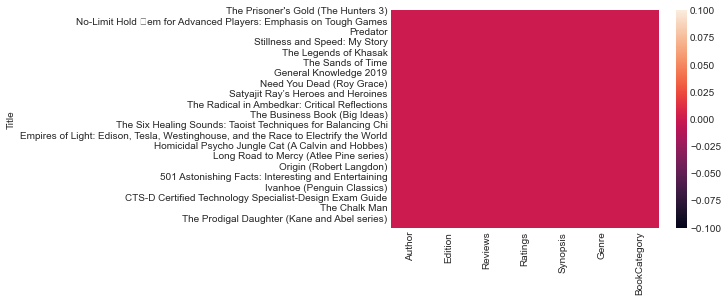

In [23]:
sns.heatmap(encoded_cat.isnull(),cbar=True)

In [24]:
encoded_cat.isnull().sum()

Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

##### The null values were replaced by the median due to prescence of outliers

In [25]:
d_f=pd.concat([encoded_cat,df_num],axis=1)
d_f.head()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
Title,,,,,,,,
The Prisoner's Gold (The Hunters 3),242.826370,373.090882,585.415088,485.781947,560.707516,401.822936,415.810905,220.00
Guru Dutt: A Tragedy in Three Acts,560.707516,344.562101,467.423361,469.504321,560.707516,732.006923,345.142701,202.93
Leviathan (Penguin Classics),330.196301,330.196301,580.589820,592.683694,330.196301,492.070001,654.300574,299.00
A Pocket Full of Rye (Miss Marple),241.170870,228.033542,418.689806,453.639300,560.707516,342.978945,337.337593,180.00
LIFE 70 Years of Extraordinary Photography,560.707516,560.707516,786.563462,771.994933,560.707516,1439.466889,833.266151,965.62


##### Creating functions to find scores and rmse of the model

In [26]:
def get_train_rmse(model):
    train_pred=model.predict(X_train)
    mse=mean_squared_error(y_train,train_pred)
    rmse=np.sqrt(mse)
    return rmse

In [27]:
def get_score(model):
    score=model.score(X_train,y_train)
    return score
    

In [28]:
score_card=pd.DataFrame(columns=['Model Name','RMSE','Alpha','Model Score'])
def update_score_card(algo_name,model,alpha='-'):
    global score_card
    score_card=score_card.append({"Model Name":algo_name,"RMSE":get_train_rmse(model),"Alpha":alpha,
                                  "Model Score":get_score(model)},ignore_index=True)
    return score_card

##### Buliding Base Model

In [29]:
X_train=d_f.iloc[:6237,:7]
y_train=d_f.iloc[:6237,[7]]
X_test=d_f.iloc[6237:,:7]

In [30]:
lin_reg_base=LinearRegression()
lin_reg_base.fit(X_train,y_train)

LinearRegression()

In [31]:
update_score_card("Linear Regression Base Model",lin_reg_base)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599


<AxesSubplot:>

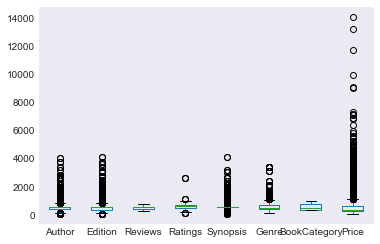

In [32]:
d_f.plot(kind='box')

##### Data Transformation to reduce outliers using Standard Scalar

In [33]:
sc=StandardScaler()
sc_cat=sc.fit_transform(encoded_cat)

In [34]:
sc_cat=pd.DataFrame(sc_cat,columns=encoded_cat.columns,index=d_f.index)

In [35]:
df_sc=pd.concat([sc_cat,d_f.iloc[:,[7]]],axis=1)
df_sc.head()

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
Title,,,,,,,,
The Prisoner's Gold (The Hunters 3),-1.015975,-0.559544,0.163288,-0.557902,0.030136,-0.531765,-0.699654,220.00
Guru Dutt: A Tragedy in Three Acts,0.140067,-0.666581,-0.667774,-0.664235,0.030136,0.604012,-1.036030,202.93
Leviathan (Penguin Classics),-0.698235,-0.720481,0.129302,0.140432,-1.291486,-0.221330,0.435544,299.00
A Pocket Full of Rye (Miss Marple),-1.021995,-1.103787,-1.011023,-0.767873,0.030136,-0.734178,-1.073182,180.00
LIFE 70 Years of Extraordinary Photography,0.140067,0.144379,1.580055,1.311779,0.030136,3.037555,1.287410,965.62


##### Scaling Independent Variables and buliding model

In [36]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
lin_reg_sc=LinearRegression()
lin_reg_sc.fit(X_train,y_train)

LinearRegression()

In [37]:
update_score_card("Linear Regression Model after Scaling",lin_reg_sc)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599


In [38]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_train=sm.add_constant(X_train)
MLR_model=sm.OLS(y_train,X_train).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:14   Log-Likelihood:                -48013.
No. Observations:                6237   AIC:                         9.604e+04
Df Residuals:                    6229   BIC:                         9.610e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          562.8248      6.759     83.267      0.000     549.574     576.075
Author         147.4511      8.571     17.204      0.000     130.649     164.253
Edition        204.8720      8.521     24.042      0.000     188.167     221.577
Reviews         30.1324      7.861      3.833      0.000      14.722      45.543
Ratings         39.2120      7.823      5.012      0.000      23.876      54.548
Synopsis       -17.8228      8.600     -2.072      0.038     -34.682      -0.964
Genre          191.7685      8.660     22.144      0.000     174.791     208.746
BookCategory     6.1373      8.521      0.720      0.471     -10.567      22.842
==============================================================================
Omnibus:                     8740.751   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4872947.561
Skew:                           7.923   Prob(JB):                         0.00
Kurtosis:                     139.015   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### As per the above OLS Model  R2 and adjusted R2 are almost the same that is 40%.Durbin-Watson:	1.935 states that the model has no auto correlation .Cond. No.	2.74 means no multi-collinearity

<AxesSubplot:>

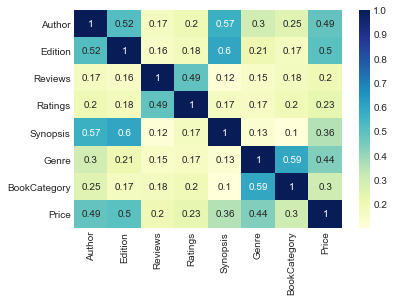

In [39]:
sns.heatmap(df_sc.corr(),annot=True,cmap='YlGnBu')

##### As per the above heatmap some of the independent variables exhibit multi-coliinearity

##### Using independent variables with high correlation with target varaibles

In [40]:
X_train=df_sc.iloc[:6237,[0,1,4,5,6]]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,[0,1,4,5,6]]
lin_reg_sig=LinearRegression()
lin_reg_sig.fit(X_train,y_train)


LinearRegression()

In [41]:
update_score_card("Linear Regression Model using significant variables",lin_reg_sig)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654


##### Using Feature Selection method to select the best features for modelling

In [42]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
lin_reg=LinearRegression()
lin_reg_forward=sfs(estimator=lin_reg,
    k_features='best',
    forward=True,
    verbose=2,
    scoring='r2')
sfs_forward=lin_reg_forward.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2021-03-20 16:33:15] Features: 1/7 -- score: 0.24112822125374836[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-03-20 16:33:15] Features: 2/7 -- score: 0.35001427123319667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-03-20 16:33:15] Features: 3/7 -- score: 0.3844715845031971[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [43]:
print("Best Features:",sfs_forward.k_feature_names_)
print("Best Score:",sfs_forward.k_score_)

Best Features: ('Author', 'Edition', 'Reviews', 'Ratings', 'Genre')
Best Score: 0.3914312090173196


In [44]:
X_train=df_sc.iloc[:6237,[0,1,2,3,5]]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,[0,1,2,3,5]]
lin_reg_feat=LinearRegression()
lin_reg_feat.fit(X_train,y_train)

LinearRegression()

In [45]:
update_score_card("Linear Regression Model after Feature Selection",lin_reg_feat)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122


In [46]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
sgd=SGDRegressor()
sgd.fit(X_train,y_train)

SGDRegressor()

##### Model building using Stochastic Gradient descent

In [47]:
update_score_card("Stochastic Gradient Descent Regressor",sgd)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728


##### Model building using Support Vector Regressor

In [48]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [49]:
update_score_card("Support Vector Regressor",svr)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728
5,Support Vector Regressor,668.565700,-,0.061314


##### Model building using Decision Tree Regressor

In [50]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
tree=DecisionTreeRegressor(random_state=1)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [51]:
update_score_card("Decision Tree Regressor",tree)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728
5,Support Vector Regressor,668.565700,-,0.061314
6,Decision Tree Regressor,178.642897,-,0.932980


##### Model building using Random Forest Regressor

In [52]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [53]:
update_score_card("Random Forest Regressor",rfr)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728
5,Support Vector Regressor,668.565700,-,0.061314
6,Decision Tree Regressor,178.642897,-,0.932980
7,Random Forest Regressor,252.942906,-,0.865638


##### Regularisation using Ridge Regression

In [54]:
X_train=df_sc.iloc[:6237,:7]
y_train=df_sc.iloc[:6237,[7]]
X_test=df_sc.iloc[6237:,:7]
ridge=Ridge(max_iter=500)
ridge.fit(X_train,y_train)

Ridge(max_iter=500)

In [55]:
update_score_card("Ridge Regression",ridge,alpha=1)

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant vari...,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728
5,Support Vector Regressor,668.565700,-,0.061314
6,Decision Tree Regressor,178.642897,-,0.932980
7,Random Forest Regressor,252.942906,-,0.865638
8,Ridge Regression,533.355734,1,0.402599


In [56]:
score_card.style.highlight_max(['Model Score'],'lightgreen')

,Model Name,RMSE,Alpha,Model Score
0,Linear Regression Base Model,533.355731,-,0.402599
1,Linear Regression Model after Scaling,533.355731,-,0.402599
2,Linear Regression Model using significant variables,536.446799,-,0.395654
3,Linear Regression Model after Feature Selection,533.568462,-,0.402122
4,Stochastic Gradient Descent Regressor,533.744197,-,0.401728
5,Support Vector Regressor,668.565700,-,0.061314
6,Decision Tree Regressor,178.642897,-,0.932980
7,Random Forest Regressor,252.942906,-,0.865638
8,Ridge Regression,533.355734,1,0.402599


##### Since Decision Tree Regressor gives the highest Model score of 93% .This model is used to predict values of the testing data. Also Rmse value for Decision Tree Regressor model is the lowest  of 178.642897 which means low bias present in the model